In [12]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Fungsi sistem yang dikendalikan PID
def system_response(Kp, Ki, Kd):
    # Simulasi dari sistem kontrol (misalnya, pendulum atau kendaraan)
    time = np.linspace(0, 10, 100)  # Waktu simulasi
    setpoint = 1.0  # Setpoint yang ingin dicapai
    
    # Simulasi dari PID controller yang mengontrol sistem
    error = setpoint - np.sin(time)  # Misalnya sistem mengikuti sin(time)
    
    # PID calculation
    integral = np.cumsum(error) * (time[1] - time[0])
    derivative = np.gradient(error, time)
    
    # Output PID controller
    control_signal = Kp * error + Ki * integral + Kd * derivative
    
    # Sistem output (misalnya, sistem yang dikendalikan oleh sinyal kontrol)
    system_output = np.sin(time) + control_signal * 0.1
    
    # Menghitung error total (magnitude error)
    total_error = np.sum(np.abs(system_output - setpoint))
    
    return total_error


In [14]:
def fitness_function(ga_instance, solution, solution_idx):
    # Menyusun parameter PID dari solusi yang diberikan oleh algoritma genetika
    Kp, Ki, Kd = solution
    
    # Menghitung total error dari sistem yang dikendalikan oleh PID
    total_error = system_response(Kp, Ki, Kd)
    
    # Fitness lebih baik jika error lebih kecil (minimalkan error)
    return -total_error  # Menggunakan negatif agar algoritma genetika meminimalkan error


In [15]:
# Parameter untuk algoritma genetika
sol_per_pop = 10  # Jumlah solusi per populasi
num_genes = 3  # Jumlah parameter PID yang akan dioptimasi (Kp, Ki, Kd)

# Interval nilai parameter PID
gene_space = {'low': 0, 'high': 100}  # Range dari parameter PID (misalnya antara 0 dan 10)

# Parameter GA
parent_selection_type = "sss"  # Selection type: sss = Stochastic Universal Sampling
crossover_type = "uniform"  # Jenis crossover
crossover_probability = 0.7  # Probabilitas crossover
crossover_percent = 0.5  # Persentase crossover
mutation_type = "random"  # Jenis mutasi
mutation_probability = 0.1  # Probabilitas mutasi
max_num_generations = 50  # Jumlah generasi
keep_parents = 1  # Jumlah individu yang dipertahankan
num_parents_mating = 4  # Jumlah orang tua yang terlibat dalam mating

# Membuat objek GA
ga_instance = pygad.GA(num_generations=max_num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                      
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       keep_parents=keep_parents)

In [31]:
# Menjalankan algoritma genetika
ga_instance.run()

# Menampilkan solusi terbaik
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Solusi terbaik PID Parameters: Kp =", solution[0], "Ki =", solution[1], "Kd =", solution[2])


Solusi terbaik PID Parameters: Kp = 8.918073409120497 Ki = 0.4622876697905176 Kd = 0.4086311526505737


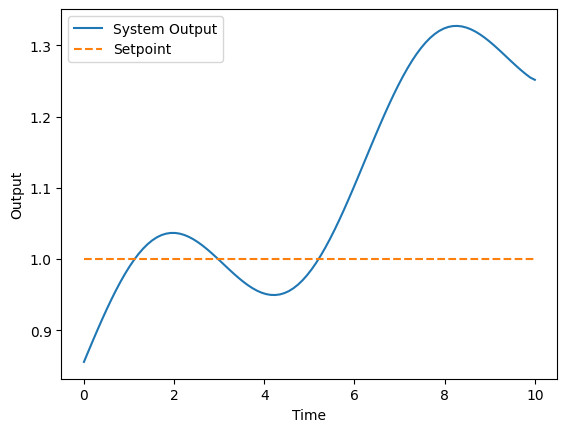

In [33]:
# Menyimulasikan sistem dengan parameter PID terbaik
Kp, Ki, Kd = solution
time = np.linspace(0, 10, 100)
setpoint = 1.0
error = setpoint - np.sin(time)
integral = np.cumsum(error) * (time[1] - time[0])
derivative = np.gradient(error, time)
control_signal = Kp * error + Ki * integral + Kd * derivative
system_output = np.sin(time) + control_signal * 0.1

# Plotting hasil
plt.plot(time, system_output, label='System Output')
plt.plot(time, setpoint*np.ones_like(time), label='Setpoint', linestyle="--")
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.show()


In [2]:
import numpy
import pygad.nn

# Preparing the NumPy array of the inputs.
data_inputs = numpy.array([[2, 5, -3, 0.1],
                           [8, 15, 20, 13]])

# Preparing the NumPy array of the outputs.
data_outputs = numpy.array([0.1,
                            1.5])

# The number of inputs (i.e. feature vector length) per sample
num_inputs = data_inputs.shape[1]
# Number of outputs per sample
num_outputs = 1

HL1_neurons = 4

# Building the network architecture.
input_layer = pygad.nn.InputLayer(num_inputs)
hidden_layer1 = pygad.nn.DenseLayer(num_neurons=HL1_neurons, previous_layer=input_layer, activation_function="relu")
output_layer = pygad.nn.DenseLayer(num_neurons=num_outputs, previous_layer=hidden_layer1, activation_function="relu")

# Training the network.
pygad.nn.train(num_epochs=1000,
               last_layer=output_layer,
               data_inputs=data_inputs,
               data_outputs=data_outputs,
               learning_rate=0.001,
               problem_type="regression")

# Using the trained network for predictions.
predictions = pygad.nn.predict(last_layer=output_layer,
                         data_inputs=data_inputs,
                         problem_type="regression")

# Calculating some statistics
abs_error = numpy.mean(numpy.abs(predictions - data_outputs))
print(f"Absolute error : {abs_error}.")

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19
Epoch  20
Epoch  21
Epoch  22
Epoch  23
Epoch  24
Epoch  25
Epoch  26
Epoch  27
Epoch  28
Epoch  29
Epoch  30
Epoch  31
Epoch  32
Epoch  33
Epoch  34
Epoch  35
Epoch  36
Epoch  37
Epoch  38
Epoch  39
Epoch  40
Epoch  41
Epoch  42
Epoch  43
Epoch  44
Epoch  45
Epoch  46
Epoch  47
Epoch  48
Epoch  49
Epoch  50
Epoch  51
Epoch  52
Epoch  53
Epoch  54
Epoch  55
Epoch  56
Epoch  57
Epoch  58
Epoch  59
Epoch  60
Epoch  61
Epoch  62
Epoch  63
Epoch  64
Epoch  65
Epoch  66
Epoch  67
Epoch  68
Epoch  69
Epoch  70
Epoch  71
Epoch  72
Epoch  73
Epoch  74
Epoch  75
Epoch  76
Epoch  77
Epoch  78
Epoch  79
Epoch  80
Epoch  81
Epoch  82
Epoch  83
Epoch  84
Epoch  85
Epoch  86
Epoch  87
Epoch  88
Epoch  89
Epoch  90
Epoch  91
Epoch  92
Epoch  93
Epoch  94
Epoch  95
Epoch  96
Epoch  97
Epoch  98
Epoch  99
Epoch  100

In [ ]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Fungsi untuk menghitung kinerja berdasarkan kriteria
def calculate_fitness(y, t, setpoint=1):
    """
    Menghitung nilai fitness berdasarkan berbagai kriteria kontrol.
    Fitness dihitung berdasarkan ISE, overshoot, dan steady-state error.
    """
    # 1. Settling Time (dalam detik) - waktu untuk mencapai 2% dari setpoint
    settling_time = t[np.where(np.abs(y - setpoint) < 0.02)[0][0]] if np.any(np.abs(y - setpoint) < 0.02) else np.nan
    
    # 2. Overshoot
    overshoot = np.max(y) - setpoint
    
    # 3. Steady-State Error
    steady_state_error = np.abs(setpoint - y[-1])
    
    # 4. ISE (Integral of Squared Error)
    ISE = simps((setpoint - y)**2, t)
    
    # 5. Penalti untuk overshoot yang besar
    overshoot_penalty = max(0, overshoot)  # Penalti overshoot
    
    # Fitness function (penalti untuk overshoot, lebih baik jika lebih kecil)
    fitness = ISE + overshoot_penalty
    
    # Menampilkan hasil evaluasi
    print(f"Settling Time: {settling_time:.2f}s, Overshoot: {overshoot:.2f}, Steady-State Error: {steady_state_error:.4f}, ISE: {ISE:.4f}")
    
    return fitness

# Fungsi untuk simulasi PID dengan parameter yang diberikan
def simulate_pid(Kp, Ki, Kd):
    # Mendefinisikan sistem plant (orde kedua)
    num = [1]
    den = [1, 10, 20]
    plant = ctrl.TransferFunction(num, den)
    
    # Membuat kontroler PID
    pid = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
    
    # Sistem closed-loop
    closed_loop = ctrl.feedback(pid * plant, 1)
    
    # Simulasi respons step
    t = np.linspace(0, 10, 1000)  # Waktu simulasi
    t, y = ctrl.step_response(closed_loop, t)
    
    # Hitung fitness
    fitness = calculate_fitness(y, t)
    
    return fitness

# Fungsi untuk optimasi PID menggunakan Genetic Algorithm
from deap import base, creator, tools, algorithms
import random

# Mendefinisikan problem optimasi
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Fitness min (lebih kecil lebih baik)
creator.create("Individual", list, fitness=creator.FitnessMin)

# Fungsi untuk membuat individu (parameter PID acak)
def create_individual():
    return [random.uniform(0, 10), random.uniform(0, 10), random.uniform(0, 10)]  # [Kp, Ki, Kd]

# Fungsi untuk evaluasi individu dalam GA
def evaluate(individual):
    Kp, Ki, Kd = individual
    fitness = simulate_pid(Kp, Ki, Kd)
    return fitness,

# Setup algoritma genetika
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Setup populasi dan parameter GA
population = toolbox.population(n=10)
ngen = 50  # Jumlah generasi
cxpb = 0.7  # Peluang crossover
mutpb = 0.2  # Peluang mutasi

# Menjalankan algoritma genetika
algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=None, halloffame=None, verbose=True)

# Menampilkan hasil terbaik
best_individual = tools.selBest(population, 1)[0]
print(f"Best PID parameters: Kp = {best_individual[0]:.4f}, Ki = {best_individual[1]:.4f}, Kd = {best_individual[2]:.4f}")


ImportError: cannot import name 'trapz' from 'scipy.integrate' (c:\Users\User\anaconda3\envs\robot_sim\lib\site-packages\scipy\integrate\__init__.py)

In [5]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Fungsi untuk menghitung kinerja berdasarkan kriteria
def calculate_fitness(y, t, setpoint=1):
    """
    Menghitung nilai fitness berdasarkan berbagai kriteria kontrol.
    Fitness dihitung berdasarkan ISE, overshoot, dan steady-state error.
    """
    # 1. Settling Time (dalam detik) - waktu untuk mencapai 2% dari setpoint
    settling_time = t[np.where(np.abs(y - setpoint) < 0.02)[0][0]] if np.any(np.abs(y - setpoint) < 0.02) else np.nan
    
    # 2. Overshoot
    overshoot = np.max(y) - setpoint
    
    # 3. Steady-State Error
    steady_state_error = np.abs(setpoint - y[-1])
    
    # 4. ISE (Integral of Squared Error) menggunakan np.cumsum
    # Menghitung integral dengan np.cumsum dan selisih waktu
    dt = t[1] - t[0]  # Menghitung interval waktu
    ISE = np.sum((setpoint - y)**2) * dt  # Integral dari squared error
    
    # 5. Penalti untuk overshoot yang besar
    overshoot_penalty = max(0, overshoot)  # Penalti overshoot
    
    # Fitness function (penalti untuk overshoot, lebih baik jika lebih kecil)
    fitness = ISE + overshoot_penalty
    
    # Menampilkan hasil evaluasi
    print(f"Settling Time: {settling_time:.2f}s, Overshoot: {overshoot:.2f}, Steady-State Error: {steady_state_error:.4f}, ISE: {ISE:.4f}")
    
    return fitness

# Fungsi untuk simulasi PID dengan parameter yang diberikan
def simulate_pid(Kp, Ki, Kd):
    # Mendefinisikan sistem plant (orde kedua)
    num = [1]
    den = [1, 10, 20]
    plant = ctrl.TransferFunction(num, den)
    
    # Membuat kontroler PID
    pid = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
    
    # Sistem closed-loop
    closed_loop = ctrl.feedback(pid * plant, 1)
    
    # Simulasi respons step
    t = np.linspace(0, 10, 1000)  # Waktu simulasi
    t, y = ctrl.step_response(closed_loop, t)
    
    # Hitung fitness
    fitness = calculate_fitness(y, t)
    
    return fitness

# Menjalankan simulasi untuk beberapa parameter PID
Kp, Ki, Kd = 1, 0.5, 0.2  # Parameter contoh
fitness = simulate_pid(Kp, Ki, Kd)
print(f"Fitness Value: {fitness}")


Settling Time: nans, Overshoot: -0.76, Steady-State Error: 0.7572, ISE: 7.3913
Fitness Value: 7.391250541517647


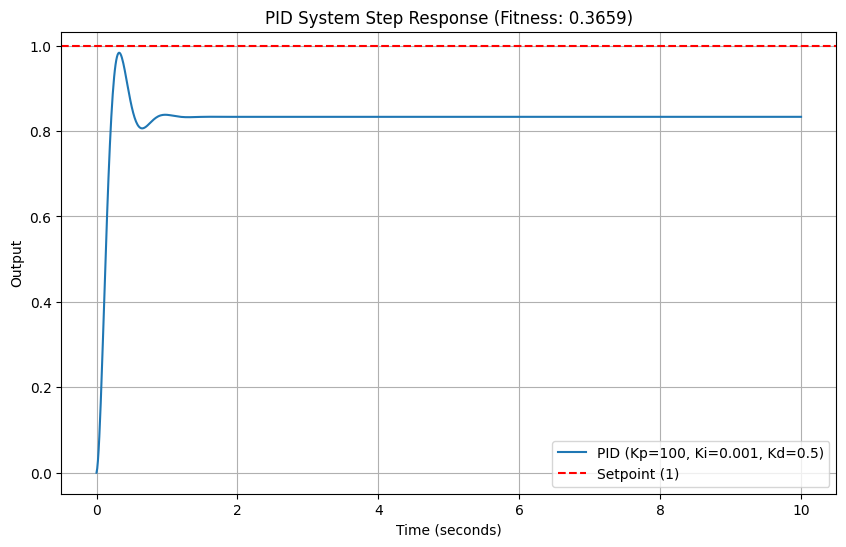

Fitness Value for PID (Kp=100, Ki=0.001, Kd=0.5): 0.3659


In [9]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Fungsi untuk menghitung kinerja berdasarkan kriteria
def calculate_fitness(y, t, setpoint=1):
    """
    Menghitung nilai fitness berdasarkan berbagai kriteria kontrol.
    Fitness dihitung berdasarkan ISE, overshoot, dan steady-state error.
    """
    # 1. Settling Time (dalam detik) - waktu untuk mencapai 2% dari setpoint
    settling_time = t[np.where(np.abs(y - setpoint) < 0.02)[0][0]] if np.any(np.abs(y - setpoint) < 0.02) else np.nan
    
    # 2. Overshoot
    overshoot = np.max(y) - setpoint
    
    # 3. Steady-State Error
    steady_state_error = np.abs(setpoint - y[-1])
    
    # 4. ISE (Integral of Squared Error) menggunakan np.cumsum
    dt = t[1] - t[0]  # Menghitung interval waktu
    ISE = np.sum((setpoint - y)**2) * dt  # Integral dari squared error
    
    # 5. Penalti untuk overshoot yang besar
    overshoot_penalty = max(0, overshoot)  # Penalti overshoot
    
    # Fitness function (penalti untuk overshoot, lebih baik jika lebih kecil)
    fitness = ISE + overshoot_penalty
    
    return fitness

# Fungsi untuk simulasi PID dengan parameter yang diberikan
def simulate_pid(Kp, Ki, Kd):
    # Mendefinisikan sistem plant (orde kedua)
    num = [1]
    den = [1, 10, 20]
    plant = ctrl.TransferFunction(num, den)
    
    # Membuat kontroler PID
    pid = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
    
    # Sistem closed-loop
    closed_loop = ctrl.feedback(pid * plant, 1)
    
    # Simulasi respons step
    t = np.linspace(0, 10, 1000)  # Waktu simulasi
    t, y = ctrl.step_response(closed_loop, t)
    
    # Hitung fitness
    fitness = calculate_fitness(y, t)
    
    return t, y, fitness

# Menjalankan simulasi untuk beberapa parameter PID
Kp, Ki, Kd = 100, 0.001, 0.5  # Parameter contoh
t, y, fitness = simulate_pid(Kp, Ki, Kd)

# Plotting Grafik Respons Step
plt.figure(figsize=(10, 6))
plt.plot(t, y, label=f"PID (Kp={Kp}, Ki={Ki}, Kd={Kd})")
plt.axhline(y=1, color='r', linestyle='--', label="Setpoint (1)")
plt.title(f"PID System Step Response (Fitness: {fitness:.4f})")
plt.xlabel('Time (seconds)')
plt.ylabel('Output')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Menampilkan hasil fitness
print(f"Fitness Value for PID (Kp={Kp}, Ki={Ki}, Kd={Kd}): {fitness:.4f}")


Best PID Parameters: Kp=91.51114415001875, Ki=9.281219714602821, Kd=6.477436016763849


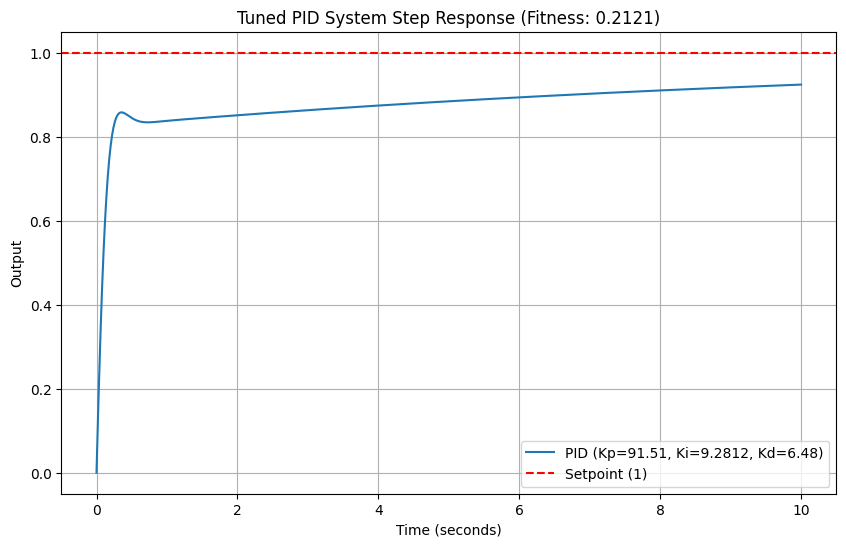

Fitness Value for Tuned PID (Kp=91.51, Ki=9.2812, Kd=6.48): 0.2121


In [16]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
import pygad

# Fungsi untuk menghitung kinerja berdasarkan kriteria
def calculate_fitness(y, t, setpoint=1):
    """
    Menghitung nilai fitness berdasarkan berbagai kriteria kontrol.
    Fitness dihitung berdasarkan ISE, overshoot, dan steady-state error.
    """
    # 1. Settling Time (dalam detik) - waktu untuk mencapai 2% dari setpoint
    settling_time = t[np.where(np.abs(y - setpoint) < 0.02)[0][0]] if np.any(np.abs(y - setpoint) < 0.02) else np.nan
    
    # 2. Overshoot
    overshoot = np.max(y) - setpoint
    
    # 3. Steady-State Error
    steady_state_error = np.abs(setpoint - y[-1])
    
    # 4. ISE (Integral of Squared Error) menggunakan np.cumsum
    dt = t[1] - t[0]  # Menghitung interval waktu
    ISE = np.sum((setpoint - y)**2) * dt  # Integral dari squared error
    
    # 5. Penalti untuk overshoot yang besar
    overshoot_penalty = max(0, overshoot)  # Penalti overshoot
    
    # Fitness function (penalti untuk overshoot, lebih baik jika lebih kecil)
    fitness = ISE + overshoot_penalty
    
    return fitness

# Fungsi untuk simulasi PID dengan parameter yang diberikan
def simulate_pid(Kp, Ki, Kd):
    # Mendefinisikan sistem plant (orde kedua)
    num = [1]
    den = [1, 10, 20]
    plant = ctrl.TransferFunction(num, den)
    
    # Membuat kontroler PID
    pid = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
    
    # Sistem closed-loop
    closed_loop = ctrl.feedback(pid * plant, 1)
    
    # Simulasi respons step
    t = np.linspace(0, 10, 1000)  # Waktu simulasi
    t, y = ctrl.step_response(closed_loop, t)
    
    # Hitung fitness
    fitness = calculate_fitness(y, t)
    
    return t, y, fitness

# Fungsi untuk evaluasi fitness dalam GA (diperbarui untuk 3 parameter)
def fitness_function(ga_instance, solution, solution_idx):
    Kp, Ki, Kd = solution  # Mengambil nilai PID dari solusi
    t, y, fitness = simulate_pid(Kp, Ki, Kd)  # Simulasikan PID dengan parameter ini
    return -fitness  # Negatif fitness karena GA memaksimalkan nilai fitness

# Mendefinisikan parameter GA
num_generations = 100
num_parents_mating = 20
sol_per_pop = 40
num_genes = 3  # 3 parameter: Kp, Ki, Kd

# Membuat populasi awal (nilai acak untuk Kp, Ki, Kd)
initial_population = np.random.uniform(low=[0, 0, 0], high=[100, 10, 10], size=(sol_per_pop, num_genes))

# Membuat objek GA
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=[0, 0, 0],
                       init_range_high=[100, 10, 10],
                       parent_selection_type="rank",
                       keep_parents=10,
                       crossover_type="uniform",
                       crossover_probability=0.05,
                       mutation_type="random",
                       mutation_probability=0.01,
                       initial_population=initial_population)

# Menjalankan algoritma genetika untuk optimasi PID
ga_instance.run()

# Mendapatkan solusi terbaik
best_solution = ga_instance.best_solution()
best_Kp, best_Ki, best_Kd = best_solution[0]
print(f"Best PID Parameters: Kp={best_Kp}, Ki={best_Ki}, Kd={best_Kd}")

# Menjalankan simulasi dengan parameter PID terbaik
t, y, fitness = simulate_pid(best_Kp, best_Ki, best_Kd)

# Plotting Grafik Respons Step setelah Tuning GA
plt.figure(figsize=(10, 6))
plt.plot(t, y, label=f"PID (Kp={best_Kp:.2f}, Ki={best_Ki:.4f}, Kd={best_Kd:.2f})")
plt.axhline(y=1, color='r', linestyle='--', label="Setpoint (1)")
plt.title(f"Tuned PID System Step Response (Fitness: {fitness:.4f})")
plt.xlabel('Time (seconds)')
plt.ylabel('Output')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Menampilkan hasil fitness setelah tuning GA
print(f"Fitness Value for Tuned PID (Kp={best_Kp:.2f}, Ki={best_Ki:.4f}, Kd={best_Kd:.2f}): {fitness:.4f}")


In [ ]:
import numpy as np
import gymnasium as gym
import control as ctrl

# Membuat environment Pendulum
env = gym.make("Pendulum-v1")

# Parameter sistem pendulum
g = 9.81  # percepatan gravitasi (m/s^2)
L = 1.0   # panjang pendulum (meter)
m = 1.0   # massa pendulum (kg)

# Matriks sistem dinamis untuk Pendulum (linearized model)
# Model linier untuk sistem pendulum
A = np.array([[0, 1, 0],  # Dimensi diperbarui untuk keadaan x, y, dan kecepatan sudut
              [g / L, 0, 0],
              [0, 0, 1]])

B = np.array([[0],
              [1 / (m * L**2)],
              [0]])

# Matriks biaya untuk LQR (pastikan Q dan R diatur dengan benar)
Q = np.diag([10, 1, 1])  # Penalti untuk posisi (x, y) dan kecepatan sudut (angular velocity)
R = np.array([[1]])   # Penalti untuk kontrol (torsi)

try:
    # Menghitung gain LQR menggunakan kontrol dari library 'control'
    K, _, _ = ctrl.lqr(A, B, Q, R)
except np.linalg.LinAlgError as e:
    print(f"Error in LQR computation: {e}")
    exit(1)


Error in LQR computation: Failed to find a finite solution.


In [29]:
print("Rank of A:", np.linalg.matrix_rank(A))
print("Rank of B:", np.linalg.matrix_rank(B))


Rank of A: 2
Rank of B: 1


In [30]:
import numpy as np
import gymnasium as gym

# Membuat environment Pendulum
env = gym.make("Pendulum-v1")

# Parameter PID
Kp = 10.0   # Koefisien proporsional
Ki = 0.0    # Koefisien integral
Kd = 1.0    # Koefisien derivatif

# Variabel untuk PID
prev_error = 0.0
integral = 0.0

# Loop kontrol untuk menguji PID di lingkungan Pendulum
state, info = env.reset()
done = False
total_reward = 0

while not done:
    # Memastikan bahwa state adalah vektor dengan tiga elemen: [x, y, angular velocity]
    theta = state[0]  # x = cos(theta)
    theta_dot = state[2]  # angular velocity (kecepatan sudut)

    # Setpoint yang diinginkan (theta = 0, posisi vertikal)
    setpoint = 0.0

    # Error posisi dan kecepatan
    error = setpoint - theta
    integral += error
    derivative = error - prev_error

    # Hitung output PID (torsi)
    u = Kp * error + Ki * integral + Kd * derivative

    # Terapkan kontrol ke environment
    u = np.clip(u, -2, 2)  # Membatasi torsi yang diterapkan
    state, reward, done, truncated, info = env.step([u])
    
    prev_error = error  # Update error sebelumnya
    total_reward += reward

env.close()
print(f"Total reward: {total_reward}")


KeyboardInterrupt: 